<a href="https://colab.research.google.com/github/SamPheeney/PCOL3911_Sam-Pheeney/blob/main/Sam's_QSAR_model_(1024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a model to predict IC50 or whatever... regression output.

#BEFORE YOU START:

Save your own copy of this page in your drive: Click File and choose "save in drive"

In [12]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/SamPheeney/PCOL3911_Sam-Pheeney/main/PCOL3911%20-%20Sam%20Pheeney/organophosphate_fp.csv")

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config

In [14]:
# Have a look at our data
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Expr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.34
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.69


In [15]:
# We can look at the output of data.iloc to make sure we are getting the right values in our x and y dataframes.
# Note the fist coordinates (that go into iloc) are rows and the second set are columns
data.iloc[:1,:1024]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Load data from pandas dataframe
X = data.iloc[:,:1024]
Y = data['Expr'].values

In [17]:
Y.shape # shape shows that it is a single column with 114 values

(278,)

In [18]:
#Use randomForestRegressor to generate regression model
# Note the train_test_split function is creating a 15% test set. RandomState is set to an integer value
#the code creates the same split each time and the results don't change.
import numpy as np
xtrain, xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.15, random_state=42)

#Click below for SKLearn Docs.
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr = RandomForestRegressor(random_state=42)
rfr.fit(xtrain, Ytrain)

ypred_train = rfr.predict(xtrain)

print("Training Scores")
print("_______________")
correlation = np.corrcoef(ypred_train, Ytrain)[0,1]
print("Correlation:", correlation)
score = rfr.score(xtrain, Ytrain)
print("R-squared:", score)
mse = mean_squared_error(Ytrain, ypred_train)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Training Scores
_______________
Correlation: 0.9861856478567821
R-squared: 0.9699196839335631
MSE:  0.08247094251065384
RMSE:  0.2871775452758343


### Now to assess the predictive performance of the model on the hold-out test set

In [19]:
import numpy as np

x = Ytest
y = rfr.predict(xtest)
a, b = np.polyfit(x, y, 1)

print("Test Scores")
print("_______________")
correlation = np.corrcoef(x, y)[0,1]
print("Correlation:", correlation)
rsquare = correlation**2
print("Testset Rsquare:", rsquare)
mse = mean_squared_error(Ytest, y)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Test Scores
_______________
Correlation: 0.892051981905677
Testset Rsquare: 0.7957567384218464
MSE:  0.5418491242382402
RMSE:  0.7361040172681034


In [20]:
#Find axis dimensions for scatter plot
import math
max_dim = math.ceil(max(x.max(),y.max())) +1
min_dim = math.floor(min(x.min(), y.min())) -1

Text(0, 0.5, 'Predicted Expr Values')

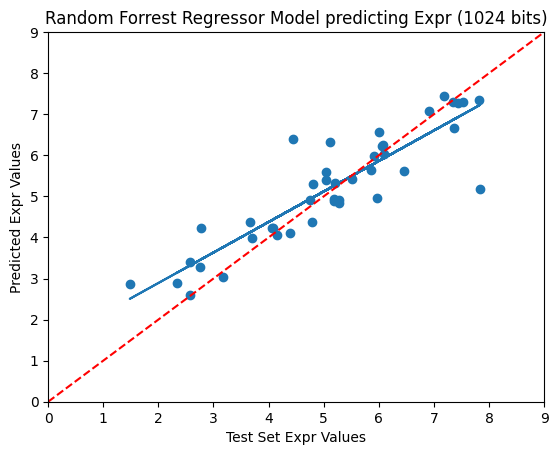

In [21]:
plt.scatter(x, y)
plt.ylim([min_dim, max_dim])
plt.xlim([min_dim, max_dim])
plt.plot(x, a*x+b)
plt.plot([min_dim, max_dim], [min_dim, max_dim], linestyle='--', color='red')
plt.title("Random Forrest Regressor Model predicting Expr (1024 bits)")
plt.xlabel('Test Set Expr Values')
plt.ylabel('Predicted Expr Values')

## Finally, you can save the model for future use.
Don't forget to download the ".pkl" file.

In [ ]:
# Finally we should save the model for future use.
# This example saves the models called "rfr" used in the demo above.
# We can generate several models by changing the random forest parameters and see which is best.
import joblib
joblib.dump(rfr, 'first_rfr.pkl')

['first_rfr.pkl']

## The code below demonstrates loading the saved model to use on a fresh prospective dataset.
Prospective data is hard to get and we often use a hold-out dataset that was not used in development of the model for the purpose of final model performance assessment.

Here is a workflow from the Scikitlearn documentation for cross validation. Note the Test Data on the right takes no part in model development and validation on the left.

https://scikit-learn.org/stable/modules/cross_validation.html


<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="400">

In [ ]:
#later you can load the model and predict on a completely new dataset.
#Load model from .pkl file
import joblib

RFR_predictor = joblib.load('first_rfr.pkl')

# Here we would have a csv file containing only the 1024 fingerprint values,
# But we don't know the LogA values for them so X_hold_out = the whole file.

X_hold_out = pd.read_csv("XXX")
# Predict data set using loaded model
New_pred = RFR_predictor.predict(X_hold_out)

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Assuming X and Y are defined somewhere in your code

xtrain, xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=42)

# Fit ExtraTreesRegressor model
etr = ExtraTreesRegressor(random_state=42)
etr.fit(xtrain, Ytrain)

# Predict on training set
ypred_train = etr.predict(xtrain)

# Print training scores
print("Training Scores")
print("_______________")
correlation = np.corrcoef(ypred_train, Ytrain)[0, 1]
print("Correlation:", correlation)
score = etr.score(xtrain, Ytrain)
print("R-squared:", score)
mse = mean_squared_error(Ytrain, ypred_train)
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

Training Scores
_______________
Correlation: 0.9984955719060759
R-squared: 0.9969934071160427
MSE:  0.008243149717514128
RMSE:  0.09079179322776992


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming x, xtest, Ytest, and etr are defined somewhere in your code

# Predict on the test set
y = etr.predict(xtest)

# Fit a linear regression model to get the coefficients
a, b = np.polyfit(Ytest, y, 1)

# Print test scores
print("Test Scores")
print("_______________")
correlation = np.corrcoef(Ytest, y)[0, 1]
print("Correlation:", correlation)
rsquare = correlation ** 2
print("Testset Rsquare:", rsquare)
mse = mean_squared_error(Ytest, y)
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

Test Scores
_______________
Correlation: 0.8826853471202918
Testset Rsquare: 0.77913342202087
MSE:  0.6070591791402091
RMSE:  0.7791400253742642


In [24]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

# Assuming x and y are defined as feature variable and target variable, respectively

# Train the ExtraTreesRegressor model
etr = ExtraTreesRegressor(random_state=42)  # You can adjust parameters as needed
etr.fit(x.reshape(-1, 1), y)  # Reshape x to a 2D array if needed

# Make predictions using the trained ExtraTreesRegressor model
ypred = etr.predict(x.reshape(-1, 1))  # Reshape x to a 2D array if needed

Text(0, 0.5, 'Predicted Expr Values')

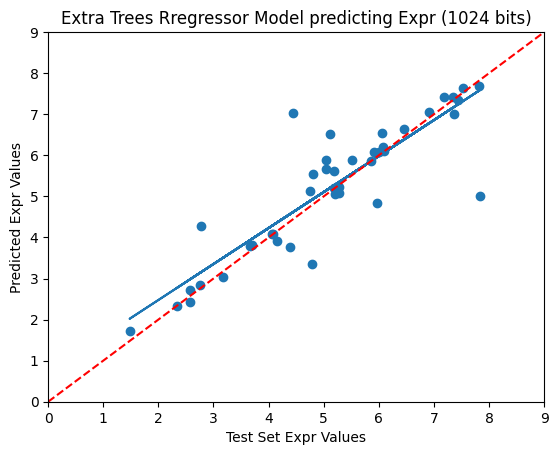

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.ylim([min_dim, max_dim])
plt.xlim([min_dim, max_dim])
plt.plot(x, a*x+b)
plt.plot([min_dim, max_dim], [min_dim, max_dim], linestyle='--', color='red')
plt.title("Extra Trees Rregressor Model predicting Expr (1024 bits)")
plt.xlabel('Test Set Expr Values')
plt.ylabel('Predicted Expr Values')

In [ ]:
# Finally we should save the model for future use.
# This example saves the models called "etr" used in the demo above.
# We can generate several models by changing the random forest parameters and see which is best.
import joblib
joblib.dump(etr, 'first_etr.pkl')

['first_etr.pkl']

In [ ]:
#later you can load the model and predict on a completely new dataset.
#Load model from .pkl file
import joblib

ETR_predictor = joblib.load('first_etr.pkl')

# Here we would have a csv file containing only the 1024 fingerprint values,
# But we don't know the LogA values for them so X_hold_out = the whole file.

X_hold_out = pd.read_csv("XXX.csv")

# Predict data set using loaded model
New_pred = ETR_predictor.predict(X_hold_out)